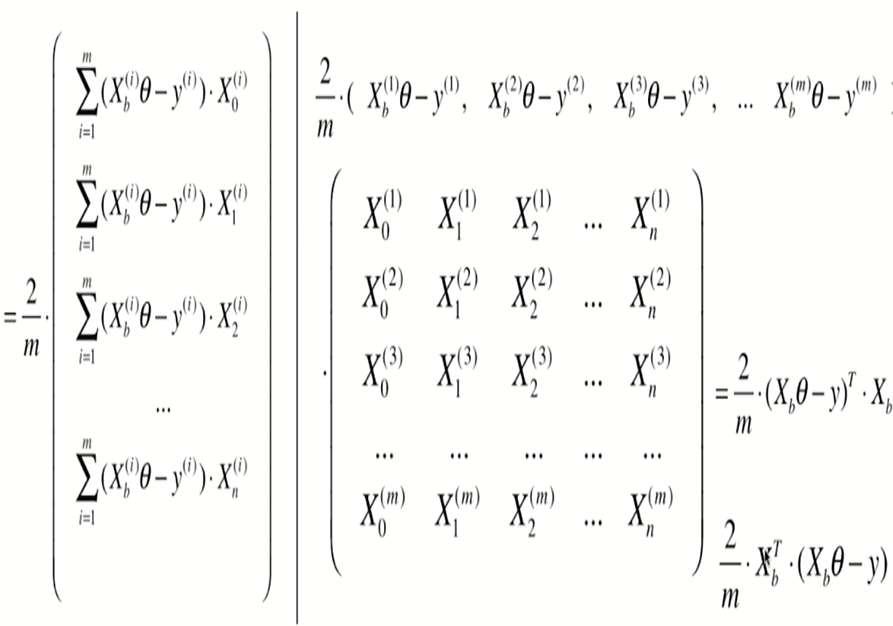

## 梯度下降法的向量化

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [4]:
from playML.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 13.9 ms


0.8129802602658359

## 使用梯度下降法

In [5]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

E:\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
E:\Anaconda3\lib\site-packages\playML\LinearRegression.py:33: RuntimeWarning: overflow encountered in square
  return np.sum((y-x_b.dot(theta))**2)/len(y)
E:\Anaconda3\lib\site-packages\playML\LinearRegression.py:45: RuntimeWarning: invalid value encountered in double_scalars
  if(abs(J(theta,x_b,y)-J(last_theta,x_b,y))<epsilon):


LinearRegression

In [6]:
lin_reg2.coef_

nan

In [7]:
X_train[:10,:]

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

In [8]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

LinearRegression

In [9]:
lin_reg2.coef_

-0.10478361472837104

In [10]:
lin_reg2.score(X_test, y_test)

0.2755663485338923

In [12]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)

Wall time: 47.6 s


LinearRegression

In [13]:
lin_reg2.score(X_test, y_test)

0.7541852353980764

 ## 使用梯度下降法前进行数据归一化

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train_standard = standardScaler.transform(X_train)

In [18]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 329 ms


LinearRegression

In [19]:
X_test_standard = standardScaler.transform(X_test)

In [20]:
lin_reg3.score(X_test_standard, y_test)

0.8129810463116105

## 梯度下降法的优势

In [24]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m,n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0.,10.,size=m)

In [25]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 8.24 s


LinearRegression

In [26]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 7.2 s


LinearRegression